In [23]:
import pandas as pd
import numpy as np
import seaborn as sns

In [107]:
history = pd.read_csv('../data/NABR_historic.csv')
df = pd.read_csv('../data/nearterm_data_2020-2024.csv')

In [25]:
history.columns

Index(['long', 'lat', 'year', 'TimePeriod', 'RCP', 'scenario', 'treecanopy',
       'Ann_Herb', 'Bare', 'Herb', 'Litter', 'Shrub',
       'DrySoilDays_Summer_whole', 'Evap_Summer',
       'ExtremeShortTermDryStress_Summer_whole', 'FrostDays_Winter',
       'NonDrySWA_Summer_whole', 'PPT_Winter', 'PPT_Summer', 'PPT_Annual',
       'T_Winter', 'T_Summer', 'T_Annual', 'Tmax_Summer', 'Tmin_Winter',
       'VWC_Winter_whole', 'VWC_Spring_whole', 'VWC_Summer_whole',
       'VWC_Fall_whole'],
      dtype='object')

In [26]:
df.columns

Index(['long', 'lat', 'year', 'TimePeriod', 'RCP', 'scenario', 'treecanopy',
       'Ann_Herb', 'Bare', 'Herb', 'Litter', 'Shrub',
       'DrySoilDays_Summer_whole', 'Evap_Summer',
       'ExtremeShortTermDryStress_Summer_whole', 'FrostDays_Winter',
       'NonDrySWA_Summer_whole', 'PPT_Winter', 'PPT_Summer', 'PPT_Annual',
       'T_Winter', 'T_Summer', 'T_Annual', 'Tmax_Summer', 'Tmin_Winter',
       'VWC_Winter_whole', 'VWC_Spring_whole', 'VWC_Summer_whole',
       'VWC_Fall_whole'],
      dtype='object')

In [27]:
history.columns == df.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [28]:
history['long'].nunique()

92

In [29]:
df['long'].nunique()

92

In [30]:
df['scenario'].nunique()

40

In [31]:
df['RCP'].nunique()

2

Representative Concentration Pathways (RCP) are climate change scenarios to project future greenhouse gas concentrations. The pathways describe different climate change scenarios, all of which were considered possible depending on the amount of greenhouse gases (GHG) emitted in the years to come. The four RCPs – originally RCP2.6, RCP4.5, RCP6, and RCP8.5 – are labelled after a possible range of radiative forcing values in the year 2100 (2.6, 4.5, 6, and 8.5 W/m2, respectively)

RCP 4.5
RCP 4.5 is described by the IPCC as an intermediate scenario.[6] Emissions in RCP 4.5 peak around 2040, then decline.[8]: Figure 2, p. 223  According to resource specialists IPCC emission scenarios are biased towards exaggerated availability of fossil fuels reserves; RCP 4.5 is the most probable baseline scenario (no climate policies) taking into account the exhaustible character of non-renewable fuels.[16][17]

According to the IPCC, RCP 4.5 requires that carbon dioxide (CO2) emissions start declining by approximately 2045 to reach roughly half of the levels of 2050 by 2100. It also requires that methane emissions (CH4) stop increasing by 2050 and decline somewhat to about 75% of the CH4 levels of 2040, and that sulphur dioxide (SO2) emissions decline to approximately 20% of those of 1980–1990. Like all the other RCPs, RCP 4.5 requires negative CO2 emissions (such as CO2 absorption by trees). For RCP 4.5, those negative emissions would be 2 Gigatons of CO2 per year (GtCO2/yr).[14] RCP 4.5 is more likely than not to result in global temperature rise between 2 °C and 3 °C, by 2100 with a mean sea level rise 35% higher than that of RCP 2.6.[18] Many plant and animal species will be unable to adapt to the effects of RCP 4.5 and higher RCPs.[19]

RCP 8.5
In RCP 8.5 emissions continue to rise throughout the 21st century.[8]: Figure 2, p. 223  Since AR5 this has been thought to be very unlikely, but still possible as feedbacks are not well understood.[21][22] RCP8.5, generally taken as the basis for worst-case climate change scenarios, was based on what proved to be overestimation of projected coal outputs. It is still used for predicting mid-century (and earlier) emissions based on current and stated policies.[23]

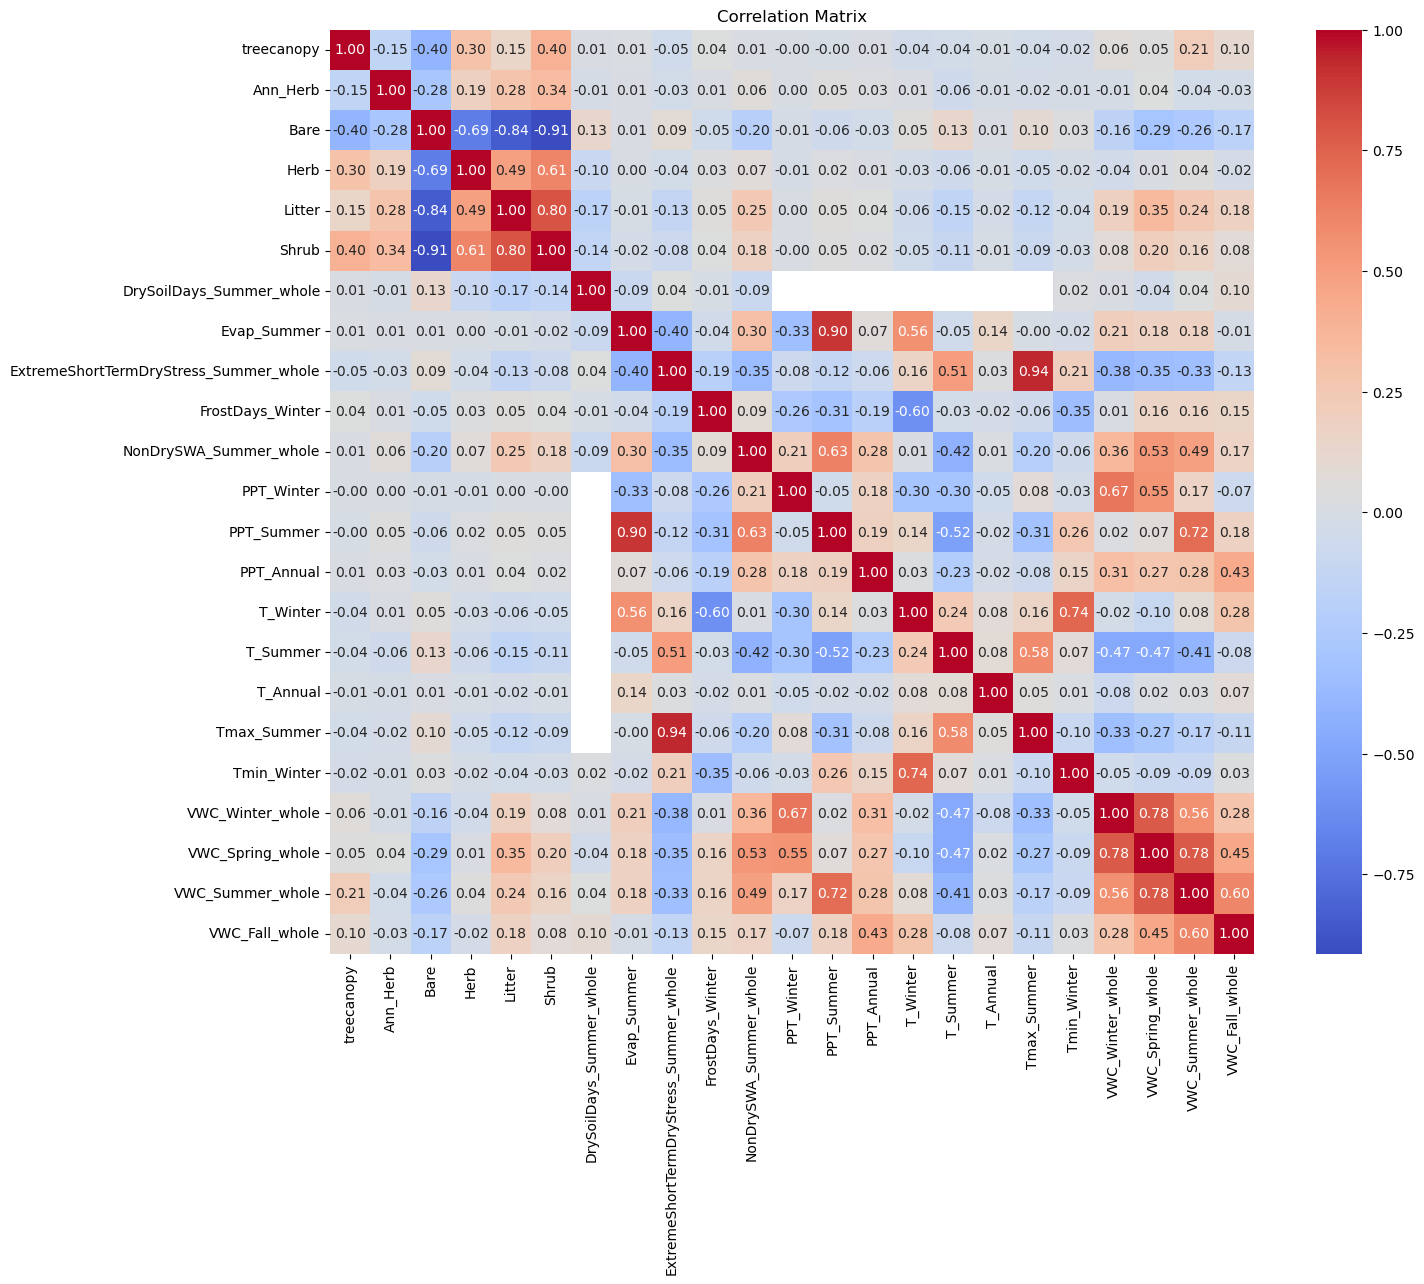

In [32]:
import matplotlib.pyplot as plt

columns_to_drop = ['long', 'lat', 'year', 'TimePeriod', 'RCP', 'scenario']
his_eda = history.drop(columns=columns_to_drop)
corr_matrix = his_eda.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

litter positive:
Bare negative: 
'NonDrySWA_Summer_whole', 'VWC_Winter_whole', 'VWC_Spring_whole', 'VWC_Summer_whole', 'VWC_Fall_whole'

In [108]:
if list(df.columns) == list(history.columns):
    # Concatenate the DataFrames along the rows
    stacked_data = pd.concat([df, history], axis=0)
    
    # Display the first few rows of the stacked DataFrame
    print(stacked_data.head())
    
    # Save the stacked dataset to a CSV file
    output_file_path = '../data/stacked_dataset.csv'
    stacked_data.to_csv(output_file_path, index=False)
else:
    print("The columns of the datasets do not match.")


       long       lat  year TimePeriod  RCP scenario  treecanopy  Ann_Herb  \
0 -110.0472  37.60413  2021         NT  4.5     sc22           0         0   
1 -110.0472  37.60413  2021         NT  4.5     sc22           0         0   
2 -110.0472  37.60413  2021         NT  4.5     sc23           0         0   
3 -110.0472  37.60413  2021         NT  4.5     sc23           0         0   
4 -110.0472  37.60413  2021         NT  4.5     sc24           0         0   

   Bare  Herb  ...  PPT_Annual  T_Winter  T_Summer  T_Annual  Tmax_Summer  \
0    84     5  ...        6.37  1.630333  24.50402  24.50402        36.89   
1    84     5  ...         NaN       NaN       NaN       NaN          NaN   
2    84     5  ...        3.09  1.389056  24.11043  24.11043        37.95   
3    84     5  ...         NaN       NaN       NaN       NaN          NaN   
4    84     5  ...        6.87 -0.334389  25.54266  10.31321        37.74   

   Tmin_Winter  VWC_Winter_whole  VWC_Spring_whole  VWC_Summer_whole

In [109]:
color_mapping = {
    'Bare': 'green',
    'Herb': 'purple',
    'Litter': 'red',
    'Shrub': 'darkblue',
    'treecanopy': 'brown',
    'Ann_Herb': 'lime', 
    'DrySoilDays_Summer_whole': 'blue', 
    'Evap_Summer': 'maroon',
    'ExtremeShortTermDryStress_Summer_whole': 'lightorange',
    'FrostDays_Winter': 'pink',
    'NonDrySWA_Summer_whole': 'blue', 
    'PPT_Winter': 'lightblue', 
    'PPT_Summer': 'lightgreen', 
    'PPT_Annual': 'teal',
    'T_Winter': 'darkpurple',
    'T_Summer': 'darkred', 
    'T_Annual': 'darkgreen', 
    'Tmax_Summer': 'yellow', 
    'Tmin_Winter': 'lightcoral',
    'VWC_Winter_whole': 'pink', 
    'VWC_Spring_whole': 'darkred', 
    'VWC_Summer_whole': 'black',
    'VWC_Fall_whole': 'orange'
}


/var/folders/fd/glpyb_f16c52ys5wz5cgrb5r0000gn/T/ipykernel_8930/2913115701.py:7: DtypeWarning:

Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.

/var/folders/fd/glpyb_f16c52ys5wz5cgrb5r0000gn/T/ipykernel_8930/2913115701.py:11: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



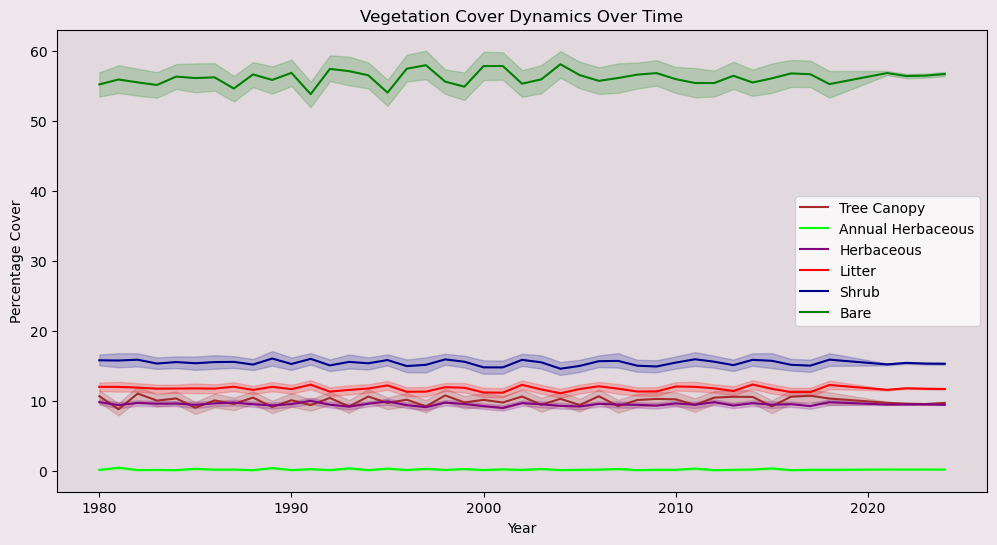

In [112]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the stacked dataset
file_path = '../data/stacked_dataset.csv'
data = pd.read_csv(file_path)

# Preprocess the Data
# Fill missing values with the mean of each column
data.fillna(data.mean(), inplace=True)

# Key Variables
# Assume vegetation cover is represented by columns like 'treecanopy', 'Ann_Herb', 'Bare', 'Herb', 'Litter', 'Shrub'
# Climate change factors could be represented by temperature and precipitation columns like 'T_Annual', 'PPT_Annual'

# Visualize Vegetation Cover Over Time

fig, ax = plt.subplots(figsize=(12, 6))

# Set the background color
light_pink = (200/255, 182/255, 193/255, 0.3)
fig.patch.set_facecolor(light_pink)
ax.set_facecolor(light_pink)

# Plot the lines
sns.lineplot(x='year', y='treecanopy', data=data, label='Tree Canopy', ax=ax, color=color_mapping['treecanopy'])
sns.lineplot(x='year', y='Ann_Herb', data=data, label='Annual Herbaceous', ax=ax, color=color_mapping['Ann_Herb'])
sns.lineplot(x='year', y='Herb', data=data, label='Herbaceous', ax=ax, color=color_mapping['Herb'])
sns.lineplot(x='year', y='Litter', data=data, label='Litter', ax=ax, color=color_mapping['Litter'])
sns.lineplot(x='year', y='Shrub', data=data, label='Shrub', ax=ax, color=color_mapping['Shrub'])
sns.lineplot(x='year', y='Bare', data=data, label='Bare', ax=ax, color=color_mapping['Bare'])

# Set title and labels
plt.title('Vegetation Cover Dynamics Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage Cover')

# Set legend
plt.legend()

# Show the plot
plt.show()

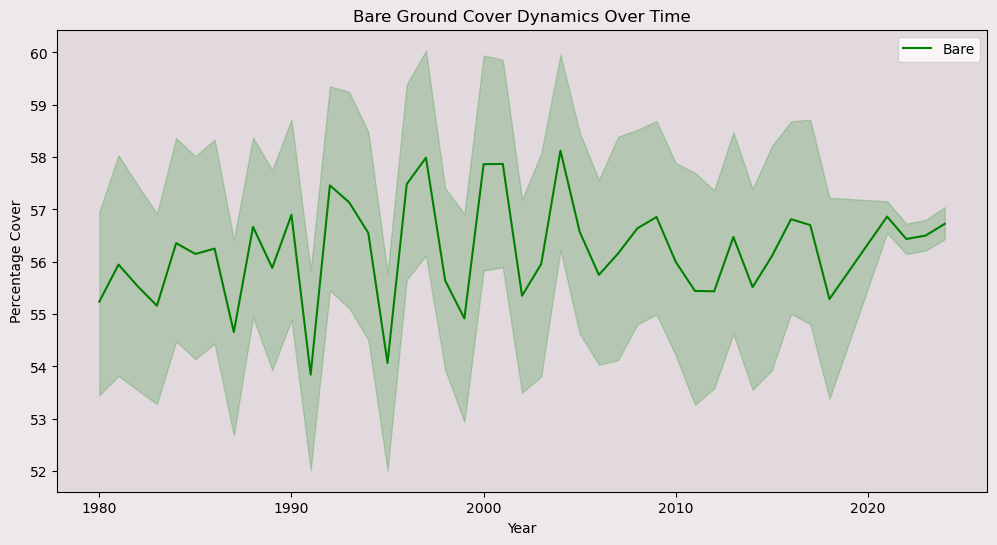

In [113]:
fig, ax = plt.subplots(figsize=(12, 6))

fig.patch.set_facecolor(light_pink)
ax.set_facecolor(light_pink)

sns.lineplot(x='year', y='Bare', data=data, label='Bare', color=color_mapping['Bare'])
plt.title('Bare Ground Cover Dynamics Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage Cover')
plt.legend()
plt.show()

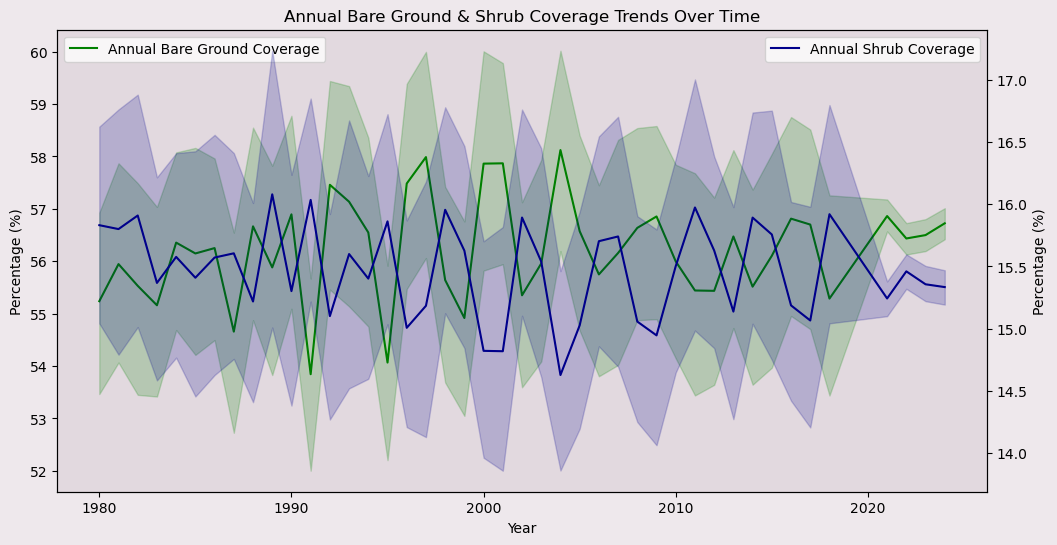

In [114]:
fig, ax1 = plt.subplots(figsize=(12, 6))

fig.patch.set_facecolor(light_pink)
ax1.set_facecolor(light_pink)

sns.lineplot(x='year', y='Bare', data=data, label='Annual Bare Ground Coverage', ax=ax1, color=color_mapping['Bare'])
ax1.set_xlabel('Year')
ax1.set_ylabel('Percentage (%)')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
sns.lineplot(x='year', y='Shrub', data=data, label='Annual Shrub Coverage', ax=ax2, color=color_mapping['Shrub'])
ax2.set_ylabel('Percentage (%)')
ax2.tick_params(axis='y')

plt.title('Annual Bare Ground & Shrub Coverage Trends Over Time')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

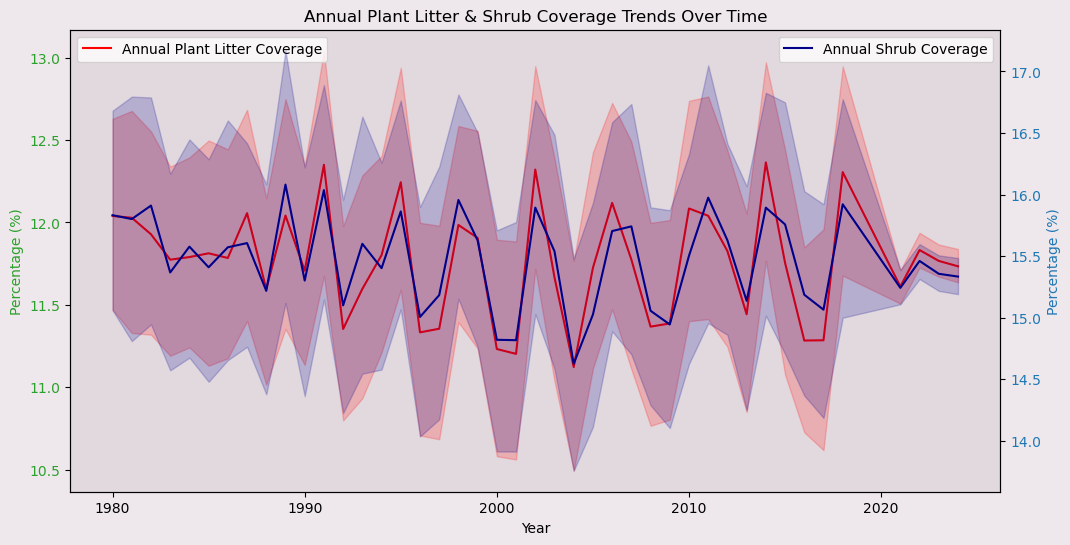

In [115]:
fig, ax1 = plt.subplots(figsize=(12, 6))

fig.patch.set_facecolor(light_pink)
ax1.set_facecolor(light_pink)
sns.lineplot(x='year', y='Litter', data=data, label='Annual Plant Litter Coverage', ax=ax1, color=color_mapping['Litter'])
ax1.set_xlabel('Year')
ax1.set_ylabel('Percentage (%)', color='tab:green')
ax1.tick_params(axis='y', labelcolor='tab:green')

ax2 = ax1.twinx()
sns.lineplot(x='year', y='Shrub', data=data, label='Annual Shrub Coverage', ax=ax2, color=color_mapping['Shrub'])
ax2.set_ylabel('Percentage (%)', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

plt.title('Annual Plant Litter & Shrub Coverage Trends Over Time')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

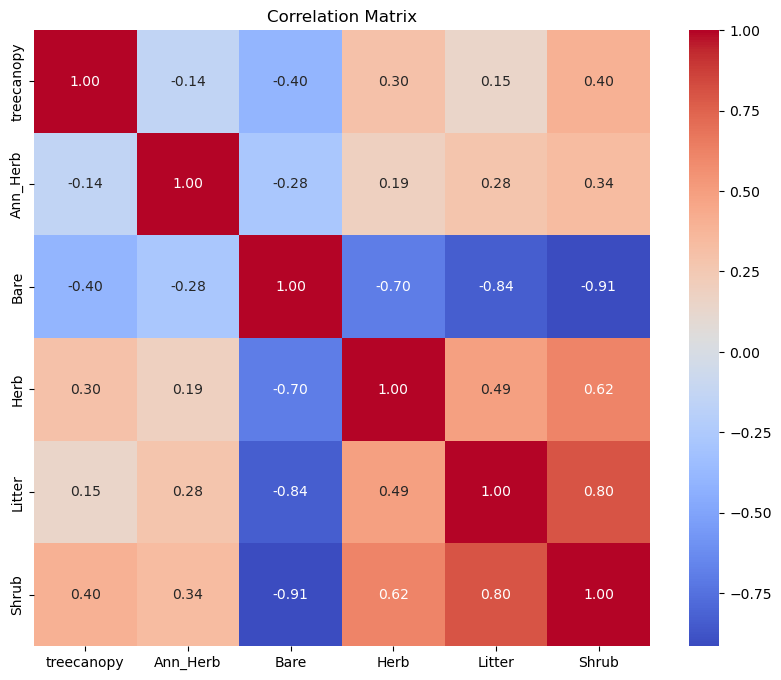

In [39]:

# Correlation Between Vegetation Cover and Climate Variables
corr_matrix = data[['treecanopy', 'Ann_Herb', 'Bare', 'Herb', 'Litter', 'Shrub']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


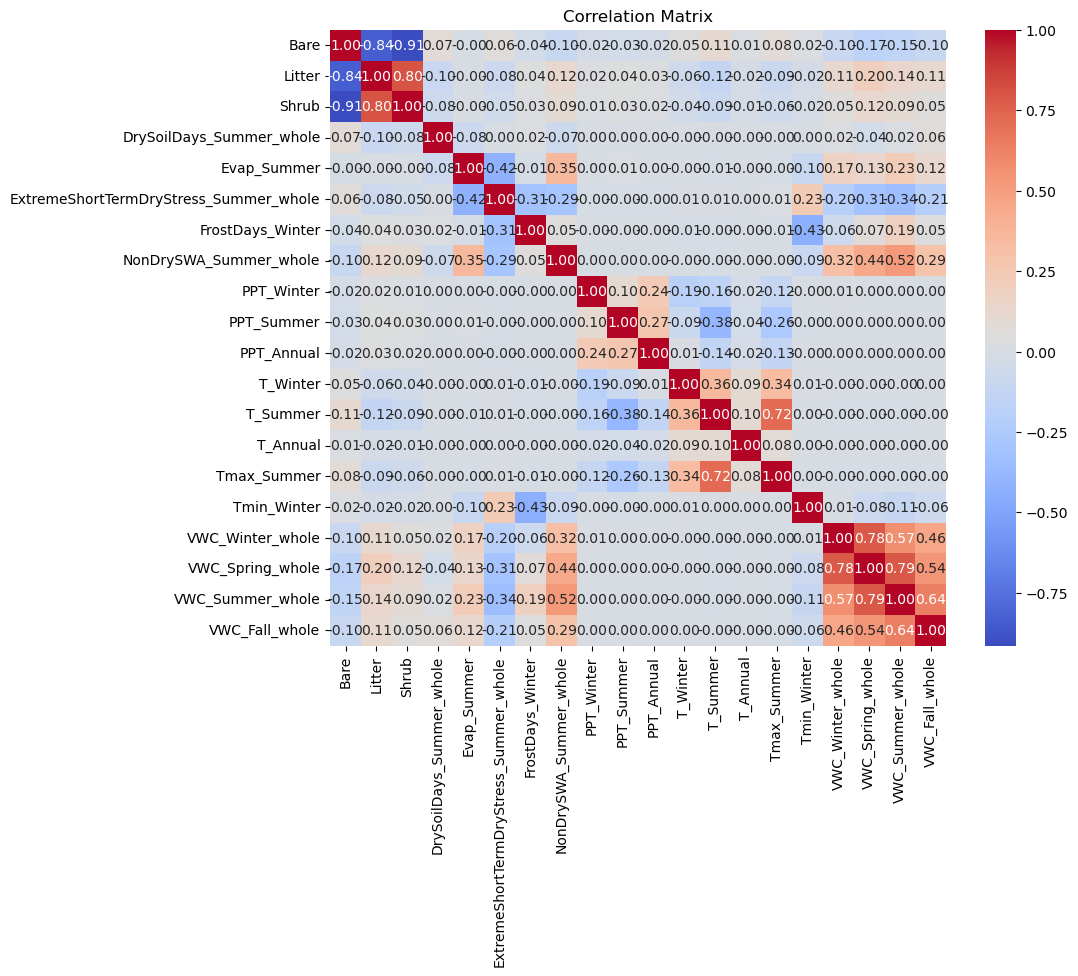

In [40]:
corr_matrix = data[['Bare', 'Litter', 'Shrub','DrySoilDays_Summer_whole', 'Evap_Summer',
       'ExtremeShortTermDryStress_Summer_whole', 'FrostDays_Winter',
       'NonDrySWA_Summer_whole', 'PPT_Winter', 'PPT_Summer', 'PPT_Annual',
       'T_Winter', 'T_Summer', 'T_Annual', 'Tmax_Summer', 'Tmin_Winter',
       'VWC_Winter_whole', 'VWC_Spring_whole', 'VWC_Summer_whole',
       'VWC_Fall_whole']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [41]:
data_unique = data.drop_duplicates(subset='long', keep='first')

In [72]:
import pandas as pd
import folium
from folium.plugins import HeatMap
import ipywidgets as widgets
from ipywidgets import interact
import branca.colormap as cm
from folium import IFrame, Popup

# Calculate the central coordinates for the initial map view
center_lat = data['lat'].mean()
center_long = data['long'].mean()

def create_heatmap(veg_type, color):
    # Filter the data
    heat_data = [[row['lat'], row['long'], row[veg_type]] for index, row in data.iterrows() if not pd.isnull(row[veg_type])]

    # Normalize the data to the range 0-1 for the heatmap
    heat_data_normalized = [[d[0], d[1], d[2] / 100] for d in heat_data]

    # Define the color map for the legend
    colormap = cm.LinearColormap(colors=['white', color], vmin=0, vmax=100, caption=f'{veg_type} Coverage (%)')

    # Create a map centered around the calculated mean latitude and longitude
    m = folium.Map(location=[center_lat, center_long], zoom_start=13)  # Adjust zoom_start as needed

    # Add the heatmap layer with a custom gradient
    HeatMap(heat_data_normalized, gradient={0.0: 'white', 1.0: color}, min_opacity=0, max_opacity=1).add_to(m)

    # Add the colormap (legend) to the map
    colormap.add_to(m)

    title_html = f'''
        <div style="position: fixed; 
                    bottom: 10px; left: 10px; width: 300px; height: 60px; 
                    background-color: white; opacity: 0.7; z-index:9999; font-size:16px;
                    border:2px solid grey; padding: 10px;">
            <b>{veg_type} Coverage Heatmap</b><br>
        </div>
    '''
    
    # Add the title and subtitle to the map
    m.get_root().html.add_child(folium.Element(title_html))

    # Display the map
    return m

# Generate heatmaps for 'Bare', 'Shrub', and 'Litter'
for veg_type in ['Bare', 'Shrub', 'Litter']:
    interact(create_heatmap, veg_type=veg_type, color=color_mapping[veg_type])

interactive(children=(Text(value='Bare', description='veg_type'), Text(value='green', description='color'), Ou…

interactive(children=(Text(value='Shrub', description='veg_type'), Text(value='darkblue', description='color')…

interactive(children=(Text(value='Litter', description='veg_type'), Text(value='red', description='color'), Ou…

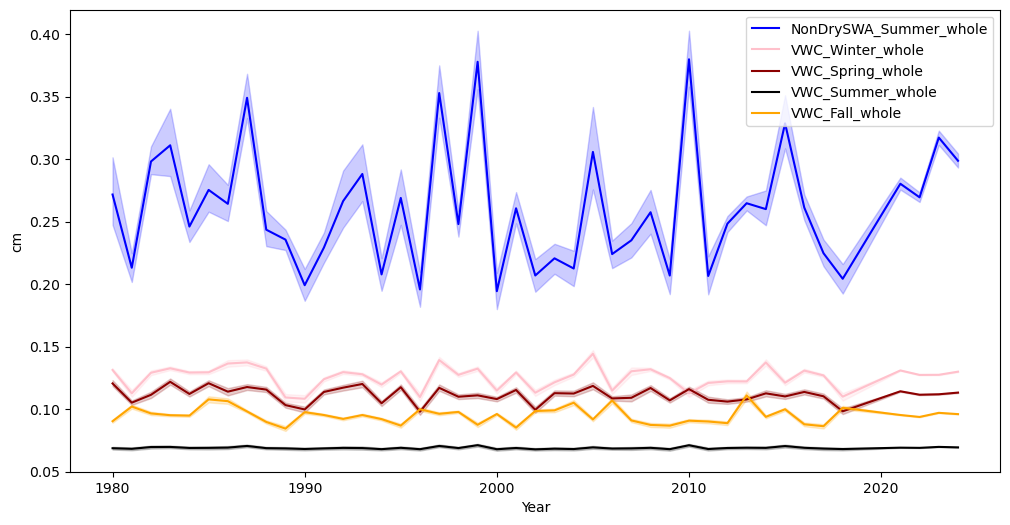

In [73]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='NonDrySWA_Summer_whole', data=data, label='NonDrySWA_Summer_whole', color=color_mapping['NonDrySWA_Summer_whole'])
sns.lineplot(x='year', y='VWC_Winter_whole', data=data, label='VWC_Winter_whole', color=color_mapping['VWC_Winter_whole'])
sns.lineplot(x='year', y='VWC_Spring_whole', data=data, label='VWC_Spring_whole', color=color_mapping['VWC_Spring_whole'])
sns.lineplot(x='year', y='VWC_Summer_whole', data=data, label='VWC_Summer_whole', color=color_mapping['VWC_Summer_whole'])
sns.lineplot(x='year', y='VWC_Fall_whole', data=data, label='VWC_Fall_whole', color=color_mapping['VWC_Fall_whole'])
plt.title('')
plt.xlabel('Year')
plt.ylabel('cm')
plt.legend()
plt.show()

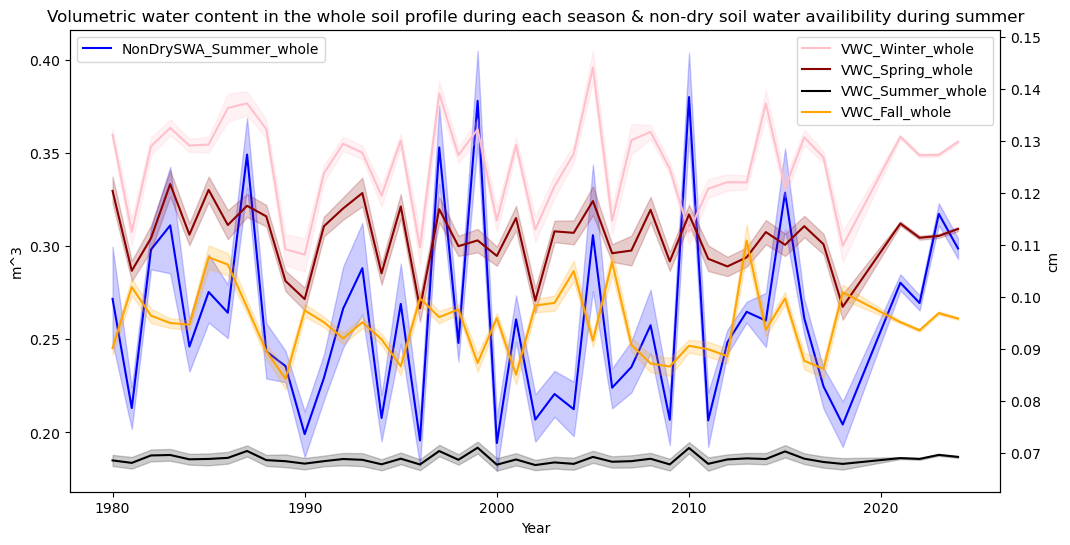

In [67]:
fig, ax1 = plt.subplots(figsize=(12, 6))
sns.lineplot(x='year', y='NonDrySWA_Summer_whole', data=data, label='NonDrySWA_Summer_whole', color=color_mapping['NonDrySWA_Summer_whole'])
ax1.set_xlabel('Year')
ax1.set_ylabel('m^3')

ax2 = ax1.twinx()
sns.lineplot(x='year', y='VWC_Winter_whole', data=data, label='VWC_Winter_whole', color=color_mapping['VWC_Winter_whole'])
sns.lineplot(x='year', y='VWC_Spring_whole', data=data, label='VWC_Spring_whole', color=color_mapping['VWC_Spring_whole'])
sns.lineplot(x='year', y='VWC_Summer_whole', data=data, label='VWC_Summer_whole', color=color_mapping['VWC_Summer_whole'])
sns.lineplot(x='year', y='VWC_Fall_whole', data=data, label='VWC_Fall_whole', color=color_mapping['VWC_Fall_whole'])
ax2.set_xlabel('Year')
ax2.set_ylabel('cm')

plt.title('Volumetric water content in the whole soil profile during each season & non-dry soil water availibility during summer')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

In [130]:
columns_to_check = ['NonDrySWA_Summer_whole', 'VWC_Winter_whole', 'VWC_Spring_whole', 'VWC_Summer_whole', 'VWC_Fall_whole']
df_1 = data.dropna(subset=columns_to_check)
df_1 = df_1.dropna(subset=columns_to_check)
df_1 = df_1.drop_duplicates(subset=columns_to_check)
df_1 = df_1.loc[
    ((df_1['RCP'] == '4.5') & (df_1['scenario'] == 'sc22')) |
    ((df_1['RCP'] == 'historical') & (df_1['scenario'] == 'sc1'))
]

mean_data_by_year = df_1.groupby('year')[columns_to_check].mean().reset_index()

df_1.to_csv('../data/df_1.csv', index=False)

In [132]:
columns_to_check_2 = ['Bare', 'Shrub']
mean_data_by_year_2 = data.groupby('year')[columns_to_check_2].mean().reset_index()

In [133]:
mean_data_by_year_2

,year,Bare,Shrub
0,1980,55.238220,15.832461
1,1981,55.946023,15.801136
2,1982,55.531343,15.910448
3,1983,55.160105,15.367454
4,1984,56.356383,15.577128
5,1985,56.149123,15.409357
6,1986,56.251497,15.571856
7,1987,54.656836,15.605898
8,1988,56.666667,15.217848
9,1989,55.882883,16.081081


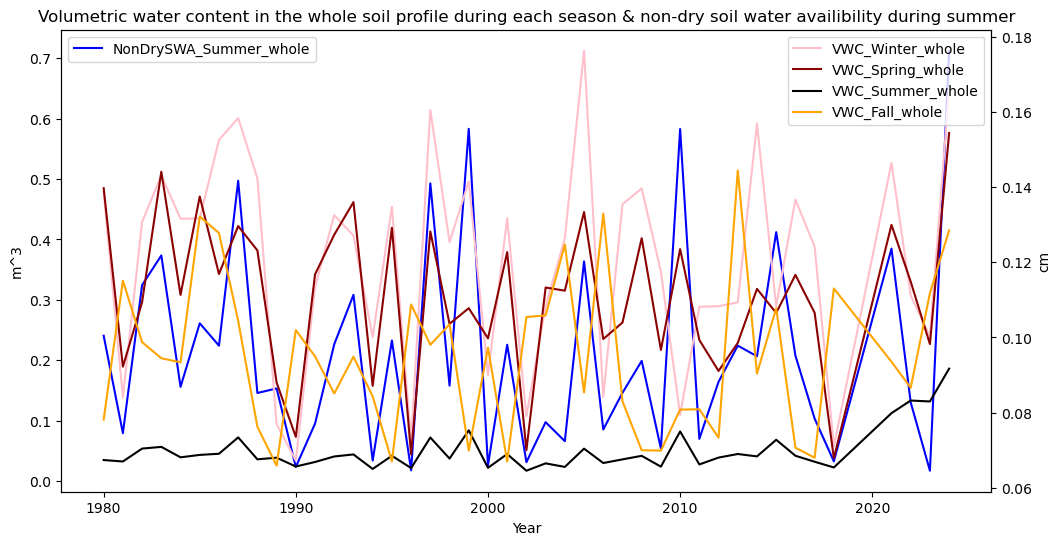

In [127]:
fig, ax1 = plt.subplots(figsize=(12, 6))
sns.lineplot(x='year', y='NonDrySWA_Summer_whole', data=mean_data_by_year, label='NonDrySWA_Summer_whole', color=color_mapping['NonDrySWA_Summer_whole'])
ax1.set_xlabel('Year')
ax1.set_ylabel('m^3')

ax2 = ax1.twinx()
sns.lineplot(x='year', y='VWC_Winter_whole', data=mean_data_by_year, label='VWC_Winter_whole', color=color_mapping['VWC_Winter_whole'])
sns.lineplot(x='year', y='VWC_Spring_whole', data=mean_data_by_year, label='VWC_Spring_whole', color=color_mapping['VWC_Spring_whole'])
sns.lineplot(x='year', y='VWC_Summer_whole', data=mean_data_by_year, label='VWC_Summer_whole', color=color_mapping['VWC_Summer_whole'])
sns.lineplot(x='year', y='VWC_Fall_whole', data=mean_data_by_year, label='VWC_Fall_whole', color=color_mapping['VWC_Fall_whole'])
ax2.set_xlabel('Year')
ax2.set_ylabel('cm')

plt.title('Volumetric water content in the whole soil profile during each season & non-dry soil water availibility during summer')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

In [ ]:
import pandas as pd
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=mean_data_by_year_2['year'], y=mean_data_by_year_2['Bare'], 
                         mode='lines', name='Bare', 
                         line=dict(color=color_mapping['Bare'])))

fig.add_trace(go.Scatter(x=mean_data_by_year_2['year'], y=mean_data_by_year_2['Shrub'], 
                         mode='lines', name='Shrub', 
                         line=dict(color=color_mapping['Shrub'])))

fig.add_trace(go.Scatter(x=mean_data_by_year['year'], y=mean_data_by_year['NonDrySWA_Summer_whole'], 
                         mode='lines', name='NonDrySWA_Summer_whole', 
                         line=dict(color=color_mapping['NonDrySWA_Summer_whole']), visible='legendonly', yaxis = 'y2'))

# Add VWC_Winter_whole to the secondary y-axis
fig.add_trace(go.Scatter(x=mean_data_by_year['year'], y=mean_data_by_year['VWC_Winter_whole'], 
                         mode='lines', name='VWC_Winter_whole', 
                         line=dict(color=color_mapping['VWC_Winter_whole']), visible='legendonly', yaxis = 'y2'))

# Add VWC_Spring_whole to the secondary y-axis
fig.add_trace(go.Scatter(x=mean_data_by_year['year'], y=mean_data_by_year['VWC_Spring_whole'], 
                         mode='lines', name='VWC_Spring_whole', 
                         line=dict(color=color_mapping['VWC_Spring_whole']), visible='legendonly', yaxis = 'y2'))

# Add VWC_Summer_whole to the secondary y-axis
fig.add_trace(go.Scatter(x=mean_data_by_year['year'], y=mean_data_by_year['VWC_Summer_whole'], 
                         mode='lines', name='VWC_Summer_whole', 
                         line=dict(color=color_mapping['VWC_Summer_whole']), visible='legendonly', yaxis = 'y2'))

# Add VWC_Fall_whole to the secondary y-axis
fig.add_trace(go.Scatter(x=mean_data_by_year['year'], y=mean_data_by_year['VWC_Fall_whole'], 
                         mode='lines', name='VWC_Fall_whole', 
                         line=dict(color=color_mapping['VWC_Fall_whole']), visible='legendonly', yaxis = 'y2'))

# Update the layout to include secondary y-axis
fig.update_layout(
    title='Volumetric Water Content Trends Over Time',
    xaxis=dict(title='Year', showgrid=False),
    yaxis=dict(title='m^3', showgrid=False),
    yaxis2=dict(title='cm', showgrid=False, overlaying='y', side='right'),
    legend=dict(x=1.10, y=1, xanchor='left', yanchor='top', bgcolor='rgba(255, 255, 255, 0.5)', bordercolor='black', borderwidth=1),
    hovermode='x unified',
    plot_bgcolor='rgba(200, 182, 193, 0.3)'
)


# Show the figure
fig.show()